#Mount and imports

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [2]:
!git clone https://github.com/iR00i/JUST-Arabic-Propaganda.git

Cloning into 'JUST-Arabic-Propaganda'...
remote: Enumerating objects: 1664, done.
remote: Counting objects: 100% (1664/1664), done.
remote: Compressing objects: 100% (1519/1519), done.
remote: Total 1664 (delta 93), reused 1640 (delta 72), pack-reused 0
Receiving objects: 100% (1664/1664), 6.15 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [4]:
!pip install transformers
!pip install openpyxl==3.0.0

     |████████████████████████████████| 3.5 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 596 kB 58.2 MB/s 
     |████████████████████████████████| 6.8 MB 39.2 MB/s 
     |████████████████████████████████| 895 kB 48.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 172 kB 5.2 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=1a0730a0361e3450dcdb9e9bee4e7f37876a46045c41bcabbe0c1f46059055a7
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


# PTC Data Exploration

In [5]:
"""
Using the original ptc-corpus for propaganda to translate to arabic.
This code is meant to get the seperate articles with their labels and join them
into a single dataframe.
"""
from os import listdir
from os.path import isfile, join
from pathlib import Path
def get_file_names_in_dir(mypath):
  return [f for f in listdir(mypath) if isfile(join(mypath, f))]

def get_data(text_path, label_path, test=False):

  df = pd.DataFrame(columns=['id','text'])
  files = get_file_names_in_dir(text_path)
  for idx, f in tqdm(enumerate(files),total=len(files), desc = 'getting text...'):
    txt = Path(text_path+'/'+f).read_text()
    # txt = txt.replace('\n', '')
    id = re.findall('\d+', f)[0]
    df = df.append({'id':id,'text':txt}, ignore_index=True)
  df.sort_values(by = ['id'],inplace=True)
  if test:
    return df
  main_df = pd.DataFrame(columns = ['id', 'text_span', 'label', "context"])
  files = get_file_names_in_dir(label_path)
  for idx, f in tqdm(enumerate(files), total = len(files), desc = 'attaching labels to text'): #looping over the label files
    temp_df = pd.read_csv(label_path+'/'+f, sep = '\t',  names = ['id','prop','start','end'])
    for idx, row in temp_df.iterrows(): #looping over a single label file
      id = str(row['id'])
      text = df.loc[df['id'] == id].text.values[0][row['start']:row['end']]
      context = df.loc[df['id'] == id].text.values[0][row['start']-300:row['end']+300]
      label = row['prop']
      main_df = main_df.append(
          {'id':id, 'text_span':text, 'label':label, 'context':context},
          ignore_index=True,
      )
  return main_df


# label_path = '/content/drive/MyDrive/Grad/Grad Proj 2/Arabic_Prop/Data/Raw-articles/train-labels-task-flc-tc/'
# text_path = '/content/drive/MyDrive/Grad/Grad Proj 2/Arabic_Prop/Data/Raw-articles/train-articles'
# train = get_data(text_path=text_path, label_path=label_path)

# label_path = '/content/drive/MyDrive/Grad/Grad Proj 2/Arabic_Prop/Data/Raw-articles/dev-labels-task-flc-tc'
# text_path = '/content/drive/MyDrive/Grad/Grad Proj 2/Arabic_Prop/Data/Raw-articles/dev-articles'
# dev = get_data(text_path=text_path, label_path=label_path)

# train.to_csv('/content/drive/MyDrive/Grad/Grad Proj 2/Arabic_Prop/Data/Raw-articles/Processed/train.csv',index=False)
# dev.to_csv('/content/drive/MyDrive/Grad/Grad Proj 2/Arabic_Prop/Data/Raw-articles/Processed/dev.csv',index=False)

In [6]:
label_path = "/content/JUST-Arabic-Propaganda/data/Original Articles/train-labels-task-flc-tc"
text_path = "/content/JUST-Arabic-Propaganda/data/Original Articles/train-articles"

train_articles = get_data(text_path=text_path, label_path=label_path) # train_articles is a pandas DataFrame object.

getting text...:   0%|          | 0/371 [00:00<?, ?it/s]

attaching labels to text:   0%|          | 0/371 [00:00<?, ?it/s]

#Translated Data Exploration

In [4]:
path = r'/content/JUST-Arabic-Propaganda/data/Translated Data/'
train = pd.read_csv(path+'train.csv')
valid = pd.read_csv(path+'valid.csv')
test = pd.read_csv(path+'test.csv')

In [ ]:
train.label.unique()

array(['Repetition', 'Loaded_Language', 'Causal_Oversimplification',
       'Slogans', 'Name_Calling,Labeling', 'Thought-terminating_Cliches',
       'Exaggeration,Minimisation', 'Doubt',
       'Bandwagon,Reductio_ad_hitlerum', 'Flag-Waving',
       'Appeal_to_fear-prejudice', 'Appeal_to_Authority',
       'Black-and-White_Fallacy', 'Whataboutism,Straw_Men,Red_Herring'],
      dtype=object)

In [ ]:
train.loc[train["label"]=="Name_Calling,Labeling"]

,id,text_span,label,Arabic
9,711716996,a dull lot,"Name_Calling,Labeling",الكثير مملة
30,773520636,the corrupt King,"Name_Calling,Labeling",الملك الفاسد
35,701225819,Grand Wizard of the Ku Klux Klan,"Name_Calling,Labeling",الساحر الكبير من كو كلوك كلان
37,788056108,the former apostolic nuncio-turned-whistleblower,"Name_Calling,Labeling",القصد الرسولي السابق الذي تحول إلى المبلغين عن...
39,783774960,the New Mexico terror compound,"Name_Calling,Labeling",مجمع نيو مكسيكو الإرهابي
...,...,...,...,...
5731,708487008,Black Death,"Name_Calling,Labeling",الموت الأسود
5735,785801366,anti-jihadist vision,"Name_Calling,Labeling",رؤية مناهضة للجهادية
5738,774007496,“unbelievers”,"Name_Calling,Labeling",«غير المؤمنين»
5745,783702663,the servitors of Vatican II,"Name_Calling,Labeling",الخدم من الفاتيكان الثاني


In [ ]:
print("Datasets Lengths\n")
print(f"train: {len(train)}")
print(f"valid: {len(valid)}")
print(f"test: {len(test)}")

Datasets Lengths

train: 5752
valid: 719
test: 720


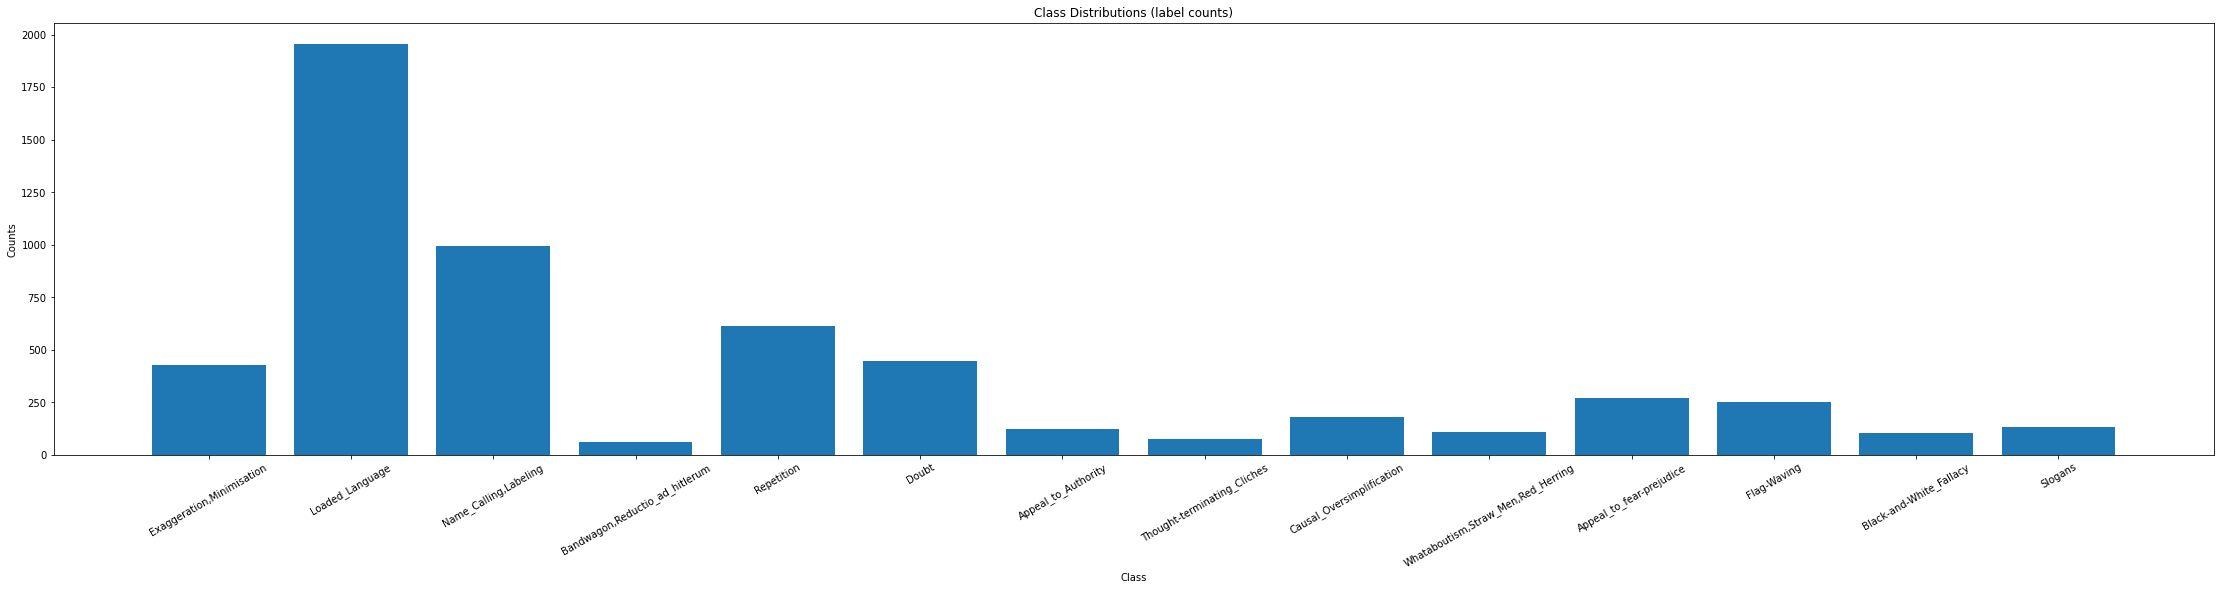

In [ ]:
fig = plt.figure(figsize=[30, 6])
ax = fig.add_axes([0,0,1,1])
labels = train.label.value_counts(sort=False).index.tolist()
students = train.label.value_counts(sort=False).tolist()
ax.bar(labels,students)
ax.set_title('Class Distributions (label counts)')
ax.set_xlabel('Class')
ax.set_ylabel('Counts')
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=30)
plt.show()

In [ ]:
train.label.value_counts(sort=False)

Exaggeration,Minimisation              427
Loaded_Language                       1958
Name_Calling,Labeling                  993
Bandwagon,Reductio_ad_hitlerum          62
Repetition                             613
Doubt                                  447
Appeal_to_Authority                    126
Thought-terminating_Cliches             74
Causal_Oversimplification              182
Whataboutism,Straw_Men,Red_Herring     109
Appeal_to_fear-prejudice               270
Flag-Waving                            253
Black-and-White_Fallacy                103
Slogans                                135
Name: label, dtype: int64

#Lengths and word count

In [6]:
path = r'/content/JUST-Arabic-Propaganda/data/Translated Data/'
arabic_train = pd.read_csv(path+'train.csv')
arabic_dev = pd.read_csv(path+'train.csv')
arabic_test = pd.read_csv(path+'train.csv')

In [10]:
# Get the max_len/ avg_len of the tokenized corpus.
import transformers
TOKENIZER = transformers.BertTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")
texts = arabic_train.Arabic.values
x = TOKENIZER.batch_encode_plus(texts)['input_ids']
max_len = 0
sum = 0
for i in x:
  sum+=len(i)
  if len(i) > max_len:
    max_len = len(i)
print(f"Max length of a vector of tokens: {max_len}, average_len: {sum/len(x)}")

Max length of a vector of tokens: 158, average_len: 10.36874130737135


In [14]:
"""
 Get average word length of the propaganada span for each propaganda technique.
"""
def get_lengths_and_word_count(df, words = False):
  labels = list(df.label.unique())
  dict_labels_word_count = {}
  dict_labels_count = dict.fromkeys(labels, 0)
  for row in df.itertuples():
    label = row.label
    if label in dict_labels_word_count:
      if words:
        dict_labels_word_count[label] += len(row.Arabic.split())
      else:
        dict_labels_word_count[label] += len(row.Arabic)
    else:
      if words:
        dict_labels_word_count[label] = len(row.Arabic.split())
      else:
        dict_labels_word_count[label] = len(row.Arabic)

    dict_labels_count[label] +=1

  for key, value in enumerate(dict_labels_word_count):
    dict_labels_word_count[value] = dict_labels_word_count[value]/dict_labels_count[value]
    
  return dict_labels_word_count

get_lengths_and_word_count(train, words=True)

{'Appeal_to_Authority': 18.738095238095237,
 'Appeal_to_fear-prejudice': 14.07037037037037,
 'Bandwagon,Reductio_ad_hitlerum': 14.741935483870968,
 'Black-and-White_Fallacy': 14.12621359223301,
 'Causal_Oversimplification': 17.763736263736263,
 'Doubt': 18.13422818791946,
 'Exaggeration,Minimisation': 6.496487119437939,
 'Flag-Waving': 8.474308300395258,
 'Loaded_Language': 3.293667007150153,
 'Name_Calling,Labeling': 3.5589123867069485,
 'Repetition': 2.463295269168026,
 'Slogans': 3.6296296296296298,
 'Thought-terminating_Cliches': 5.54054054054054,
 'Whataboutism,Straw_Men,Red_Herring': 14.155963302752294}

# Calculating the BLEU score

First step is to save the test dataset as an excel sheet. <br>
Second step is to perform manual translation of a subset of the dataset. <br>
Third step is to calculate the BLEU score between the gold manual translation and the translation of AWS.

In [25]:
path = r'/content/JUST-Arabic-Propaganda/data/Translated Data/'
train = pd.read_csv(path+'train.csv')
valid = pd.read_csv(path+'valid.csv')
test = pd.read_csv(path+'test.csv')

In [26]:
test.to_excel("drive/MyDrive/test.xlsx",index = False)

In [7]:
translation_test_data = pd.read_excel(path+"test_translation_bleu.xlsx")

In [ ]:
translation_test_data

In [20]:
from nltk.translate.bleu_score import sentence_bleu
sum = 0
for idx, row in translation_test_data.iterrows():
  reference = [translation_test_data["Arabic_gold"][idx].split()]
  candidate = translation_test_data["Arabic"][idx].split()
  score = sentence_bleu(reference, candidate)
  sum+=score

print(f"Average BLEU = {sum/len(translation_test_data)}\n")

Average BLEU = 0.7980061907068919



/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


# ACPC

In [5]:
path = r'/content/JUST-Arabic-Propaganda/data/ACPC/'
ACPC = pd.read_excel(path+"ACPC.xlsx")

In [7]:
"""
These are the originally collected datasets.
"""
path = r'/content/JUST-Arabic-Propaganda/data/ACPC/Raw Data/2020/'
march_april = pd.read_excel(path+"1_march_april.xlsx")
may_june = pd.read_excel(path+"2_may_june.xlsx")
july_august = pd.read_excel(path+"3_july_august.xlsx")
september_october = pd.read_excel(path+"4_september_october.xlsx")
november_december = pd.read_excel(path+"5_november_december.xlsx")

In [18]:
def BarPlotValueCounts(month_df, acpc, title = "title"):
  month_ids = month_df.ID.values
  acpc_ids = acpc.ID.values
  intersection = [i for i in month_ids if i in acpc_ids]
  month_labels = pd.DataFrame(columns = ["label"])
  label_list = []
  for i in intersection:
    label_list.append(acpc.loc[acpc["ID"] == i]["label"].values[0])

  month_labels["label"] = label_list
  value_counts = month_labels.label.value_counts()
  sns.set_theme(style="whitegrid")
  fig, ax = plt.subplots(figsize = (10,8))
  ax.figure.dpi = 300
  ax = sns.barplot(ax=ax, x=value_counts.values, y=value_counts.index, data=month_labels, errwidth=0)
  ax.set_title(title)

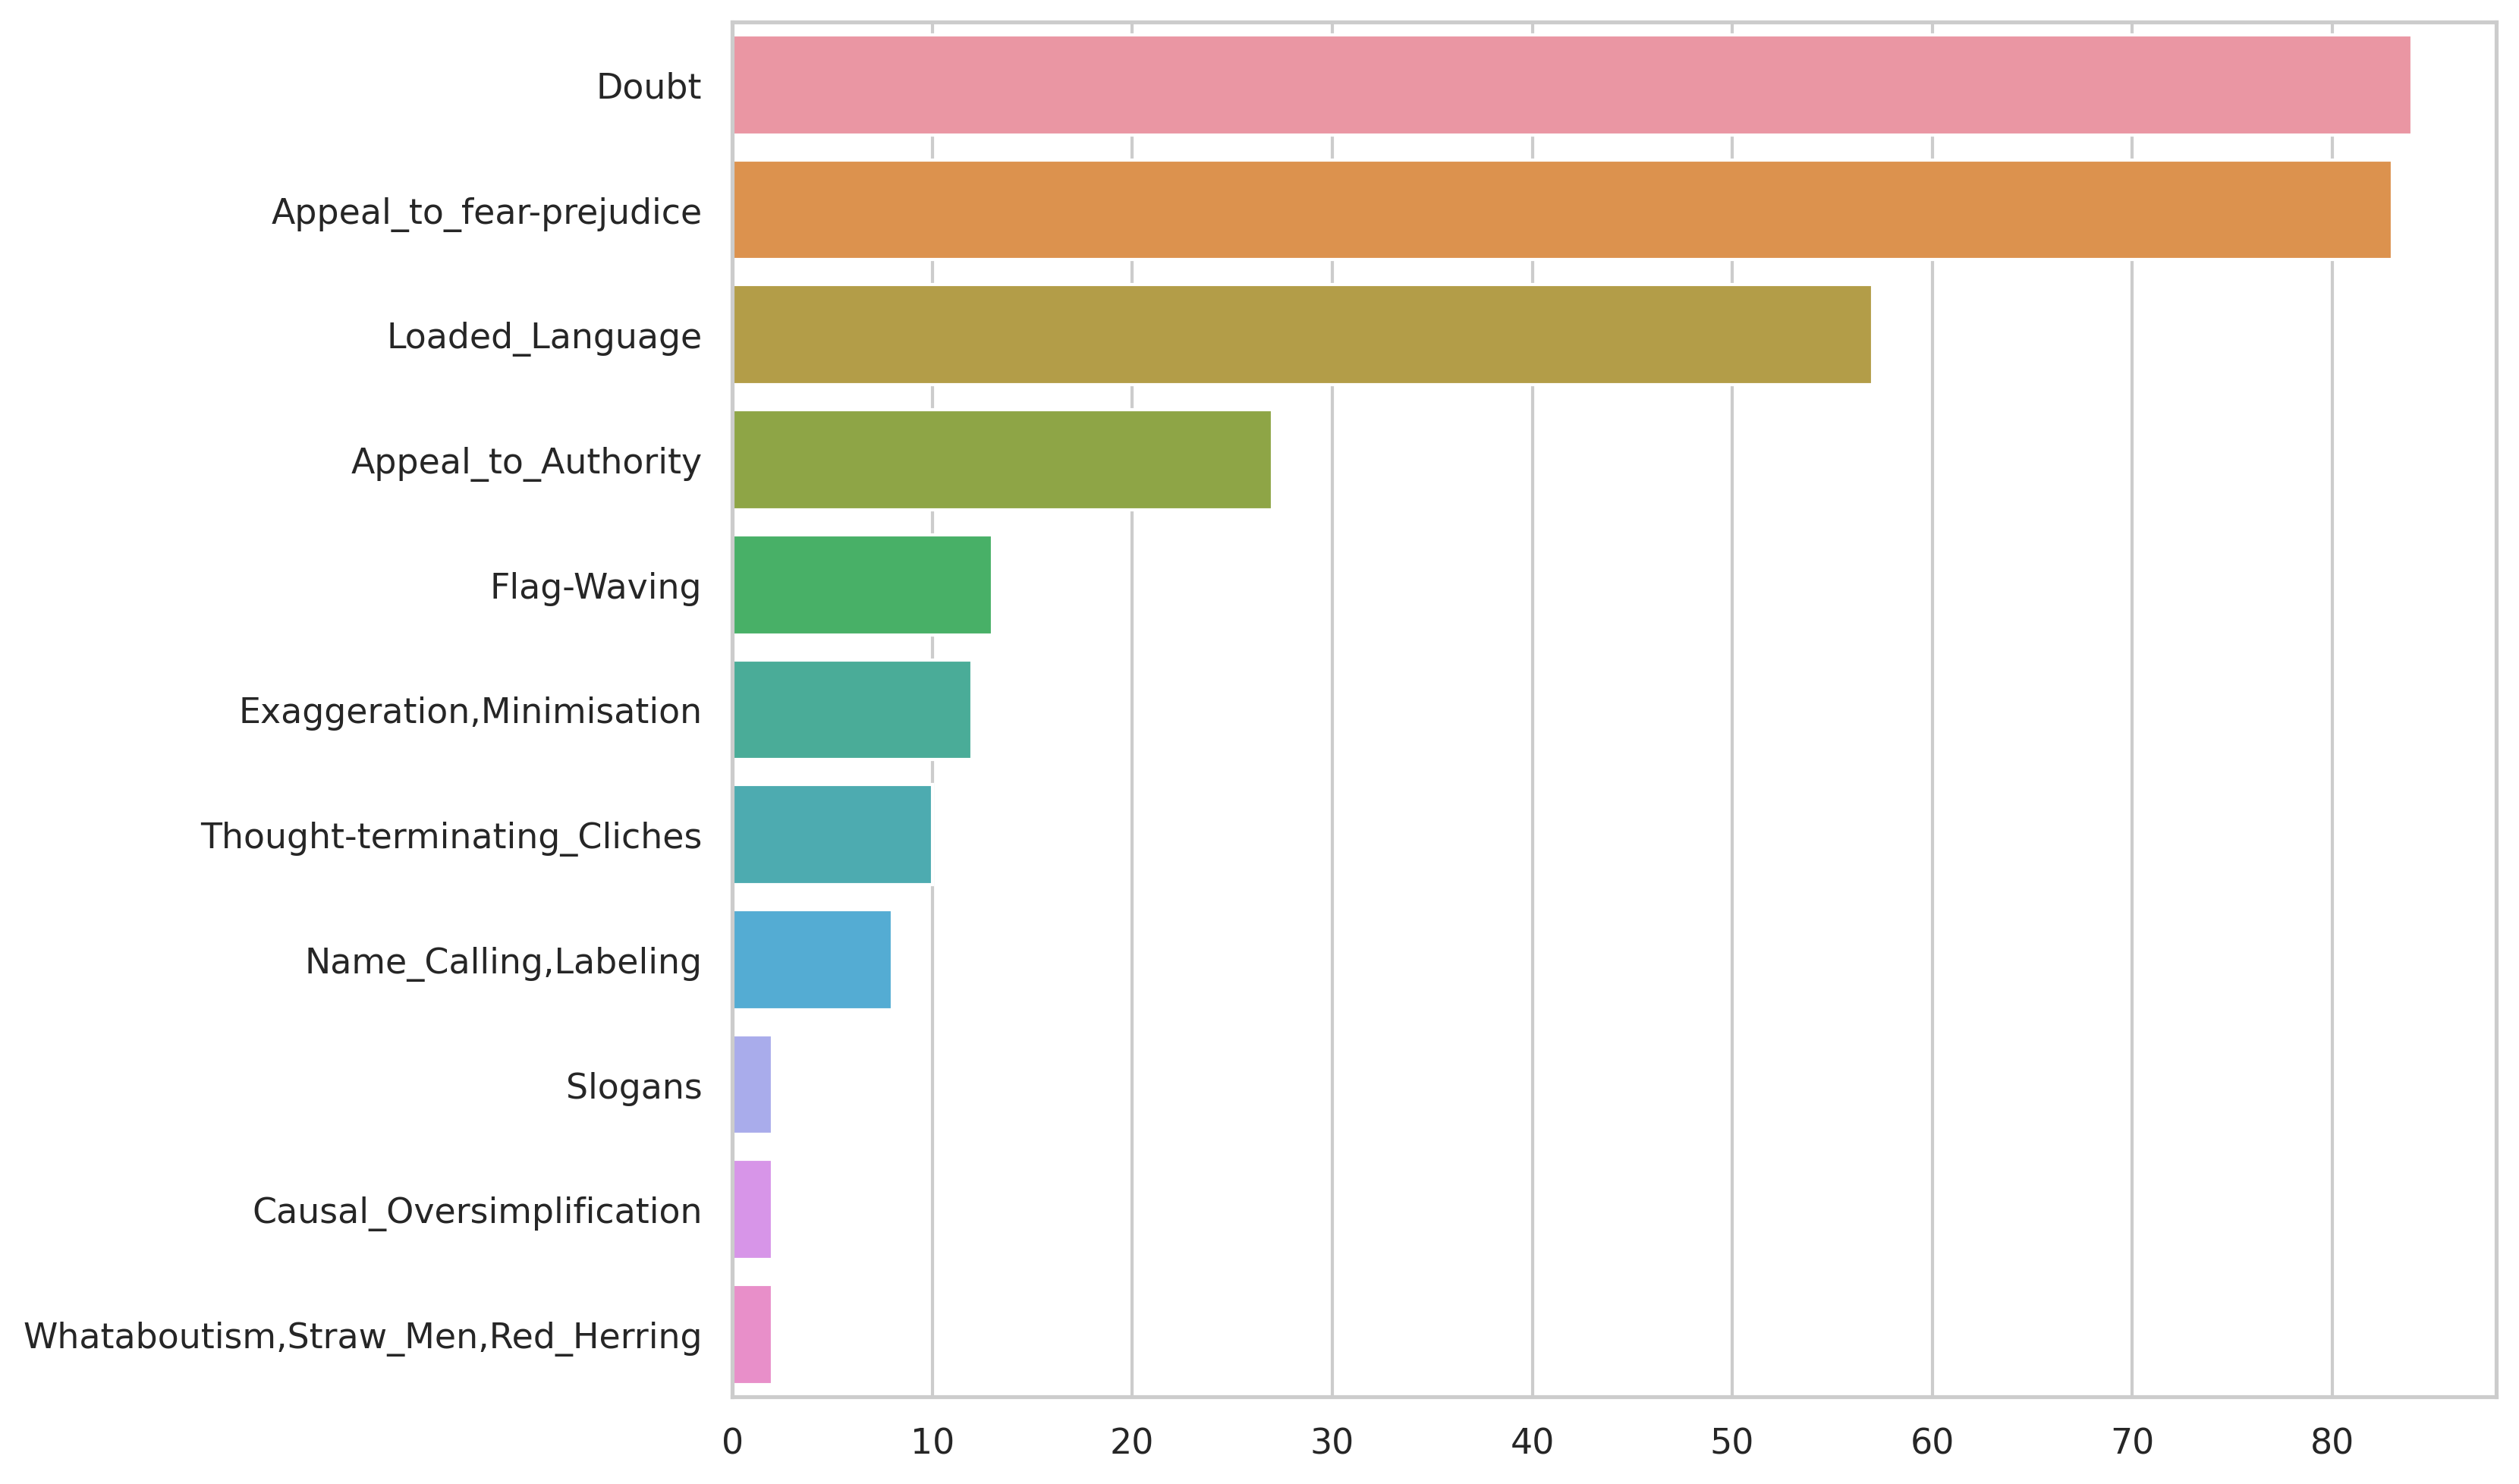

In [19]:
BarPlotValueCounts(ACPC, ACPC, title = "") # to get label frequencies in the entire dataset.

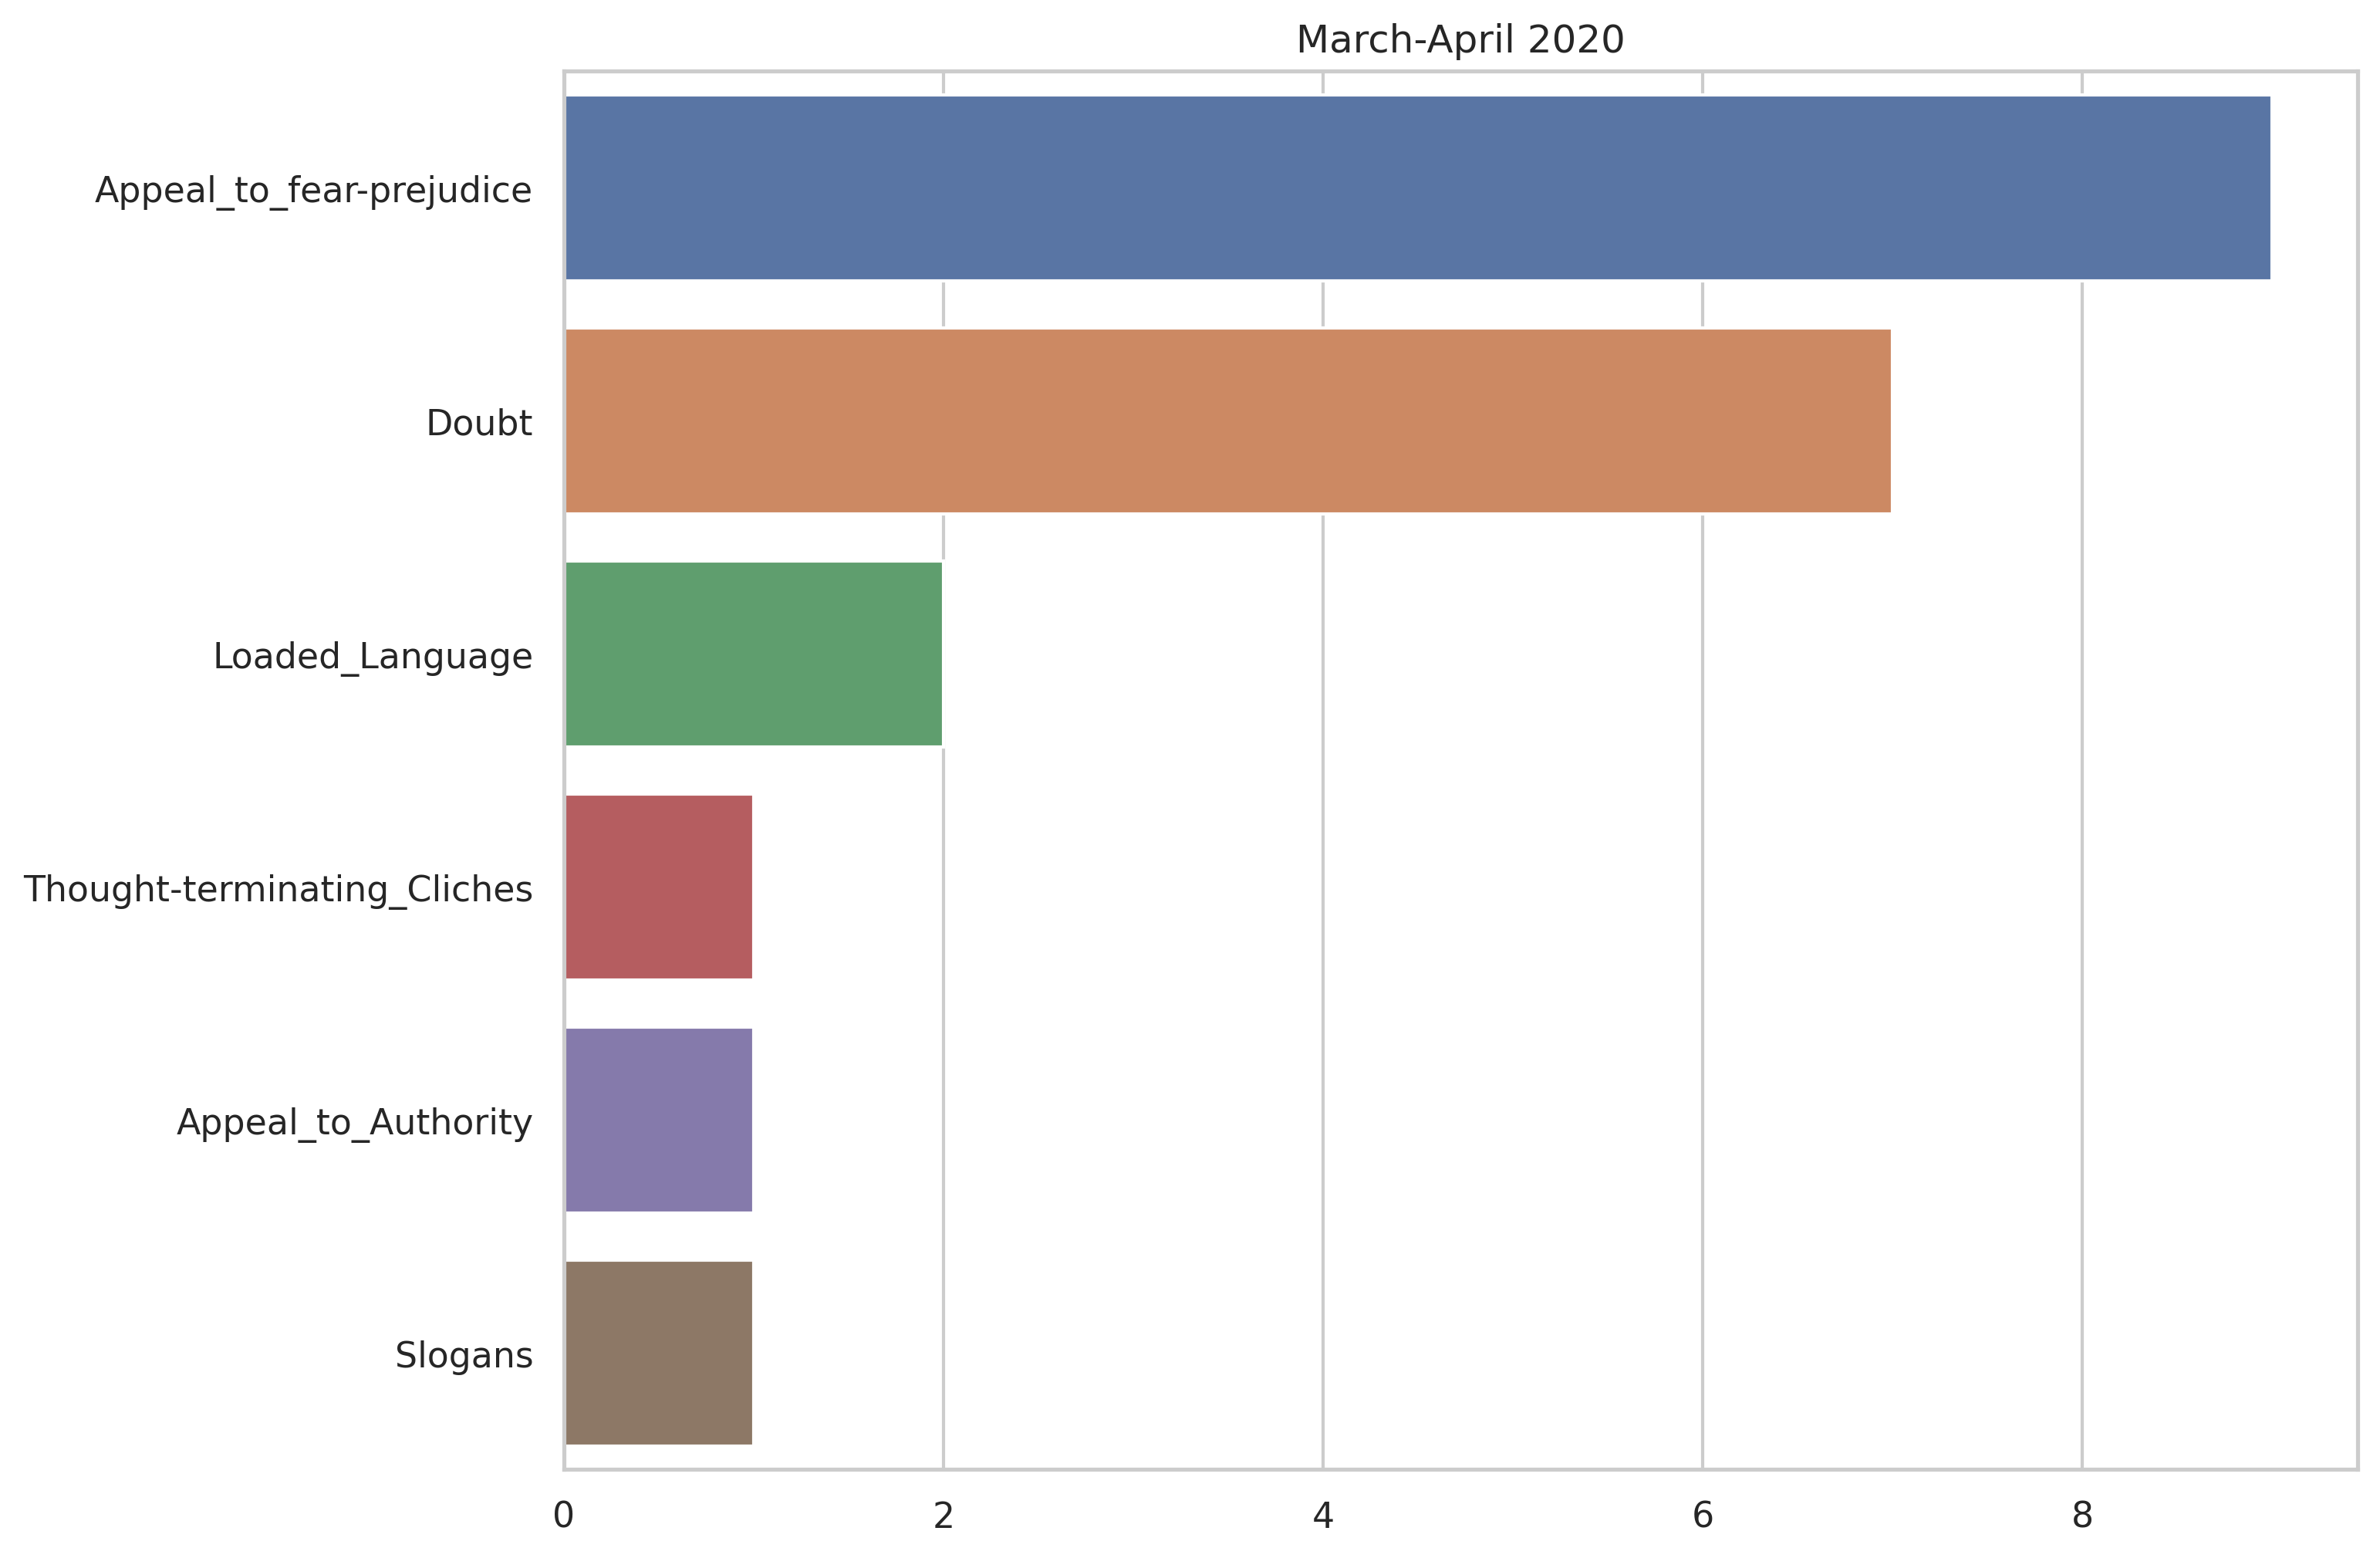

In [20]:
BarPlotValueCounts(march_april, ACPC, title = "March-April 2020")

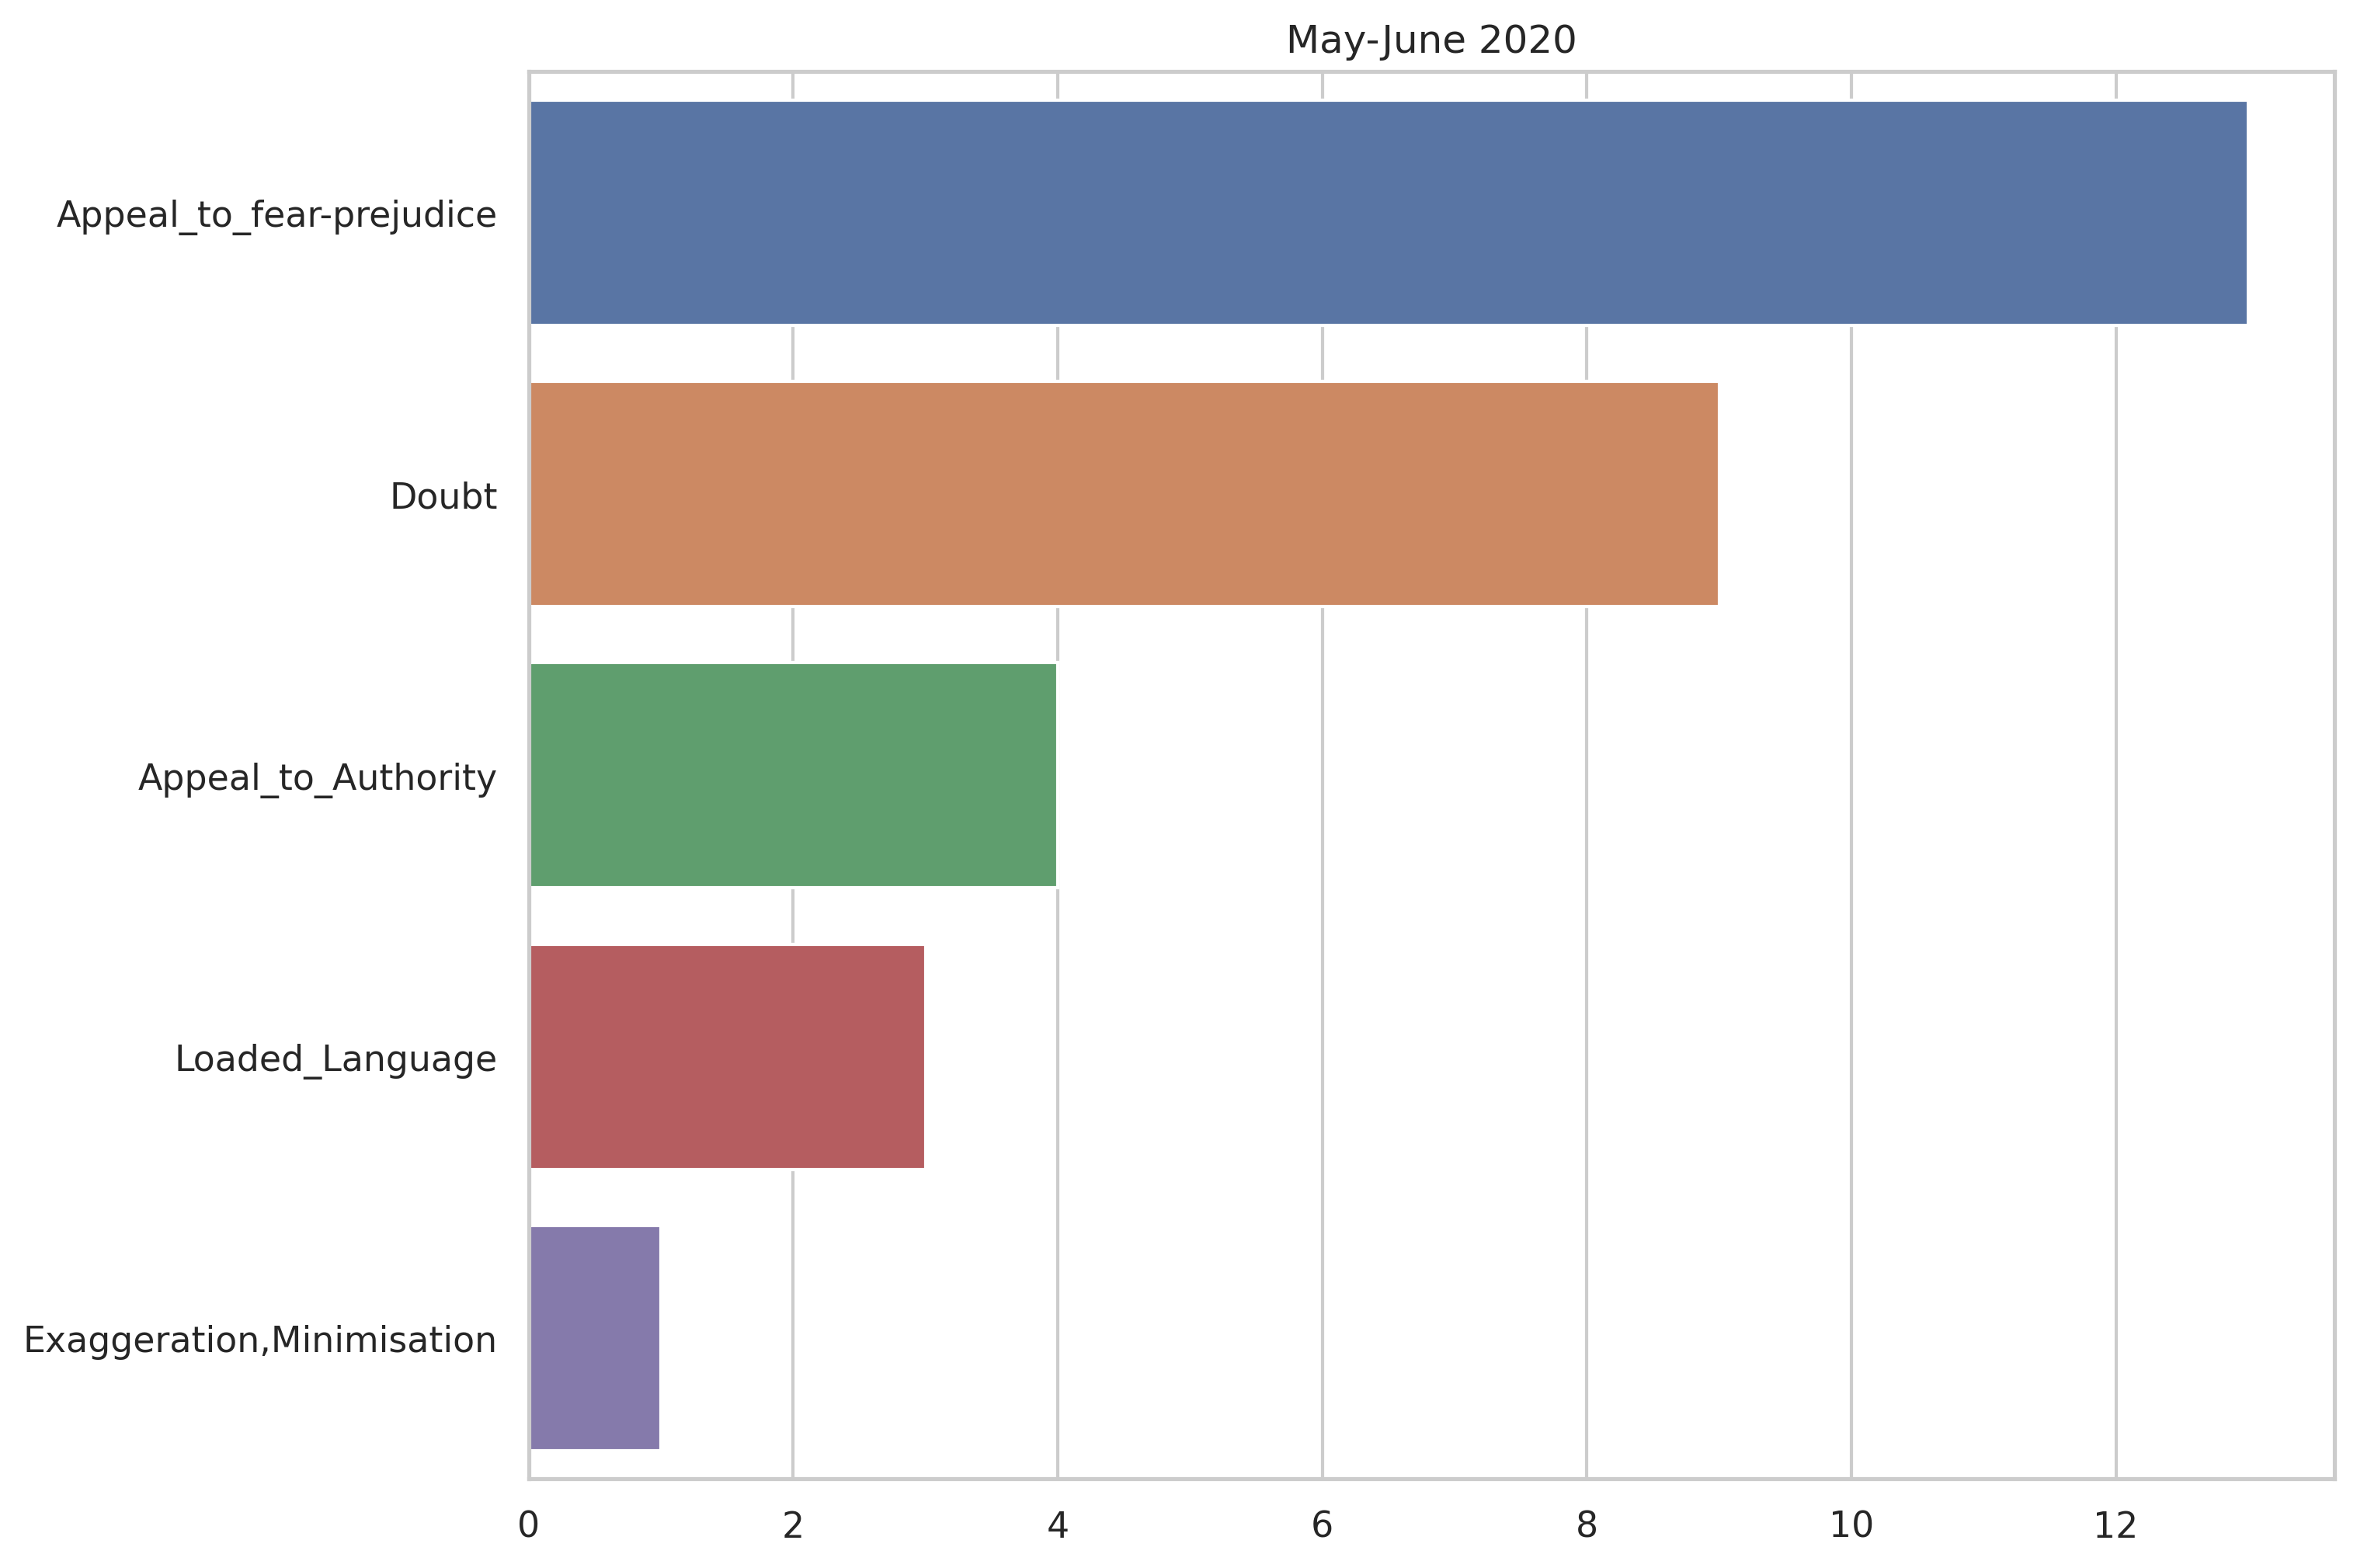

In [21]:
BarPlotValueCounts(may_june, ACPC, title = "May-June 2020")

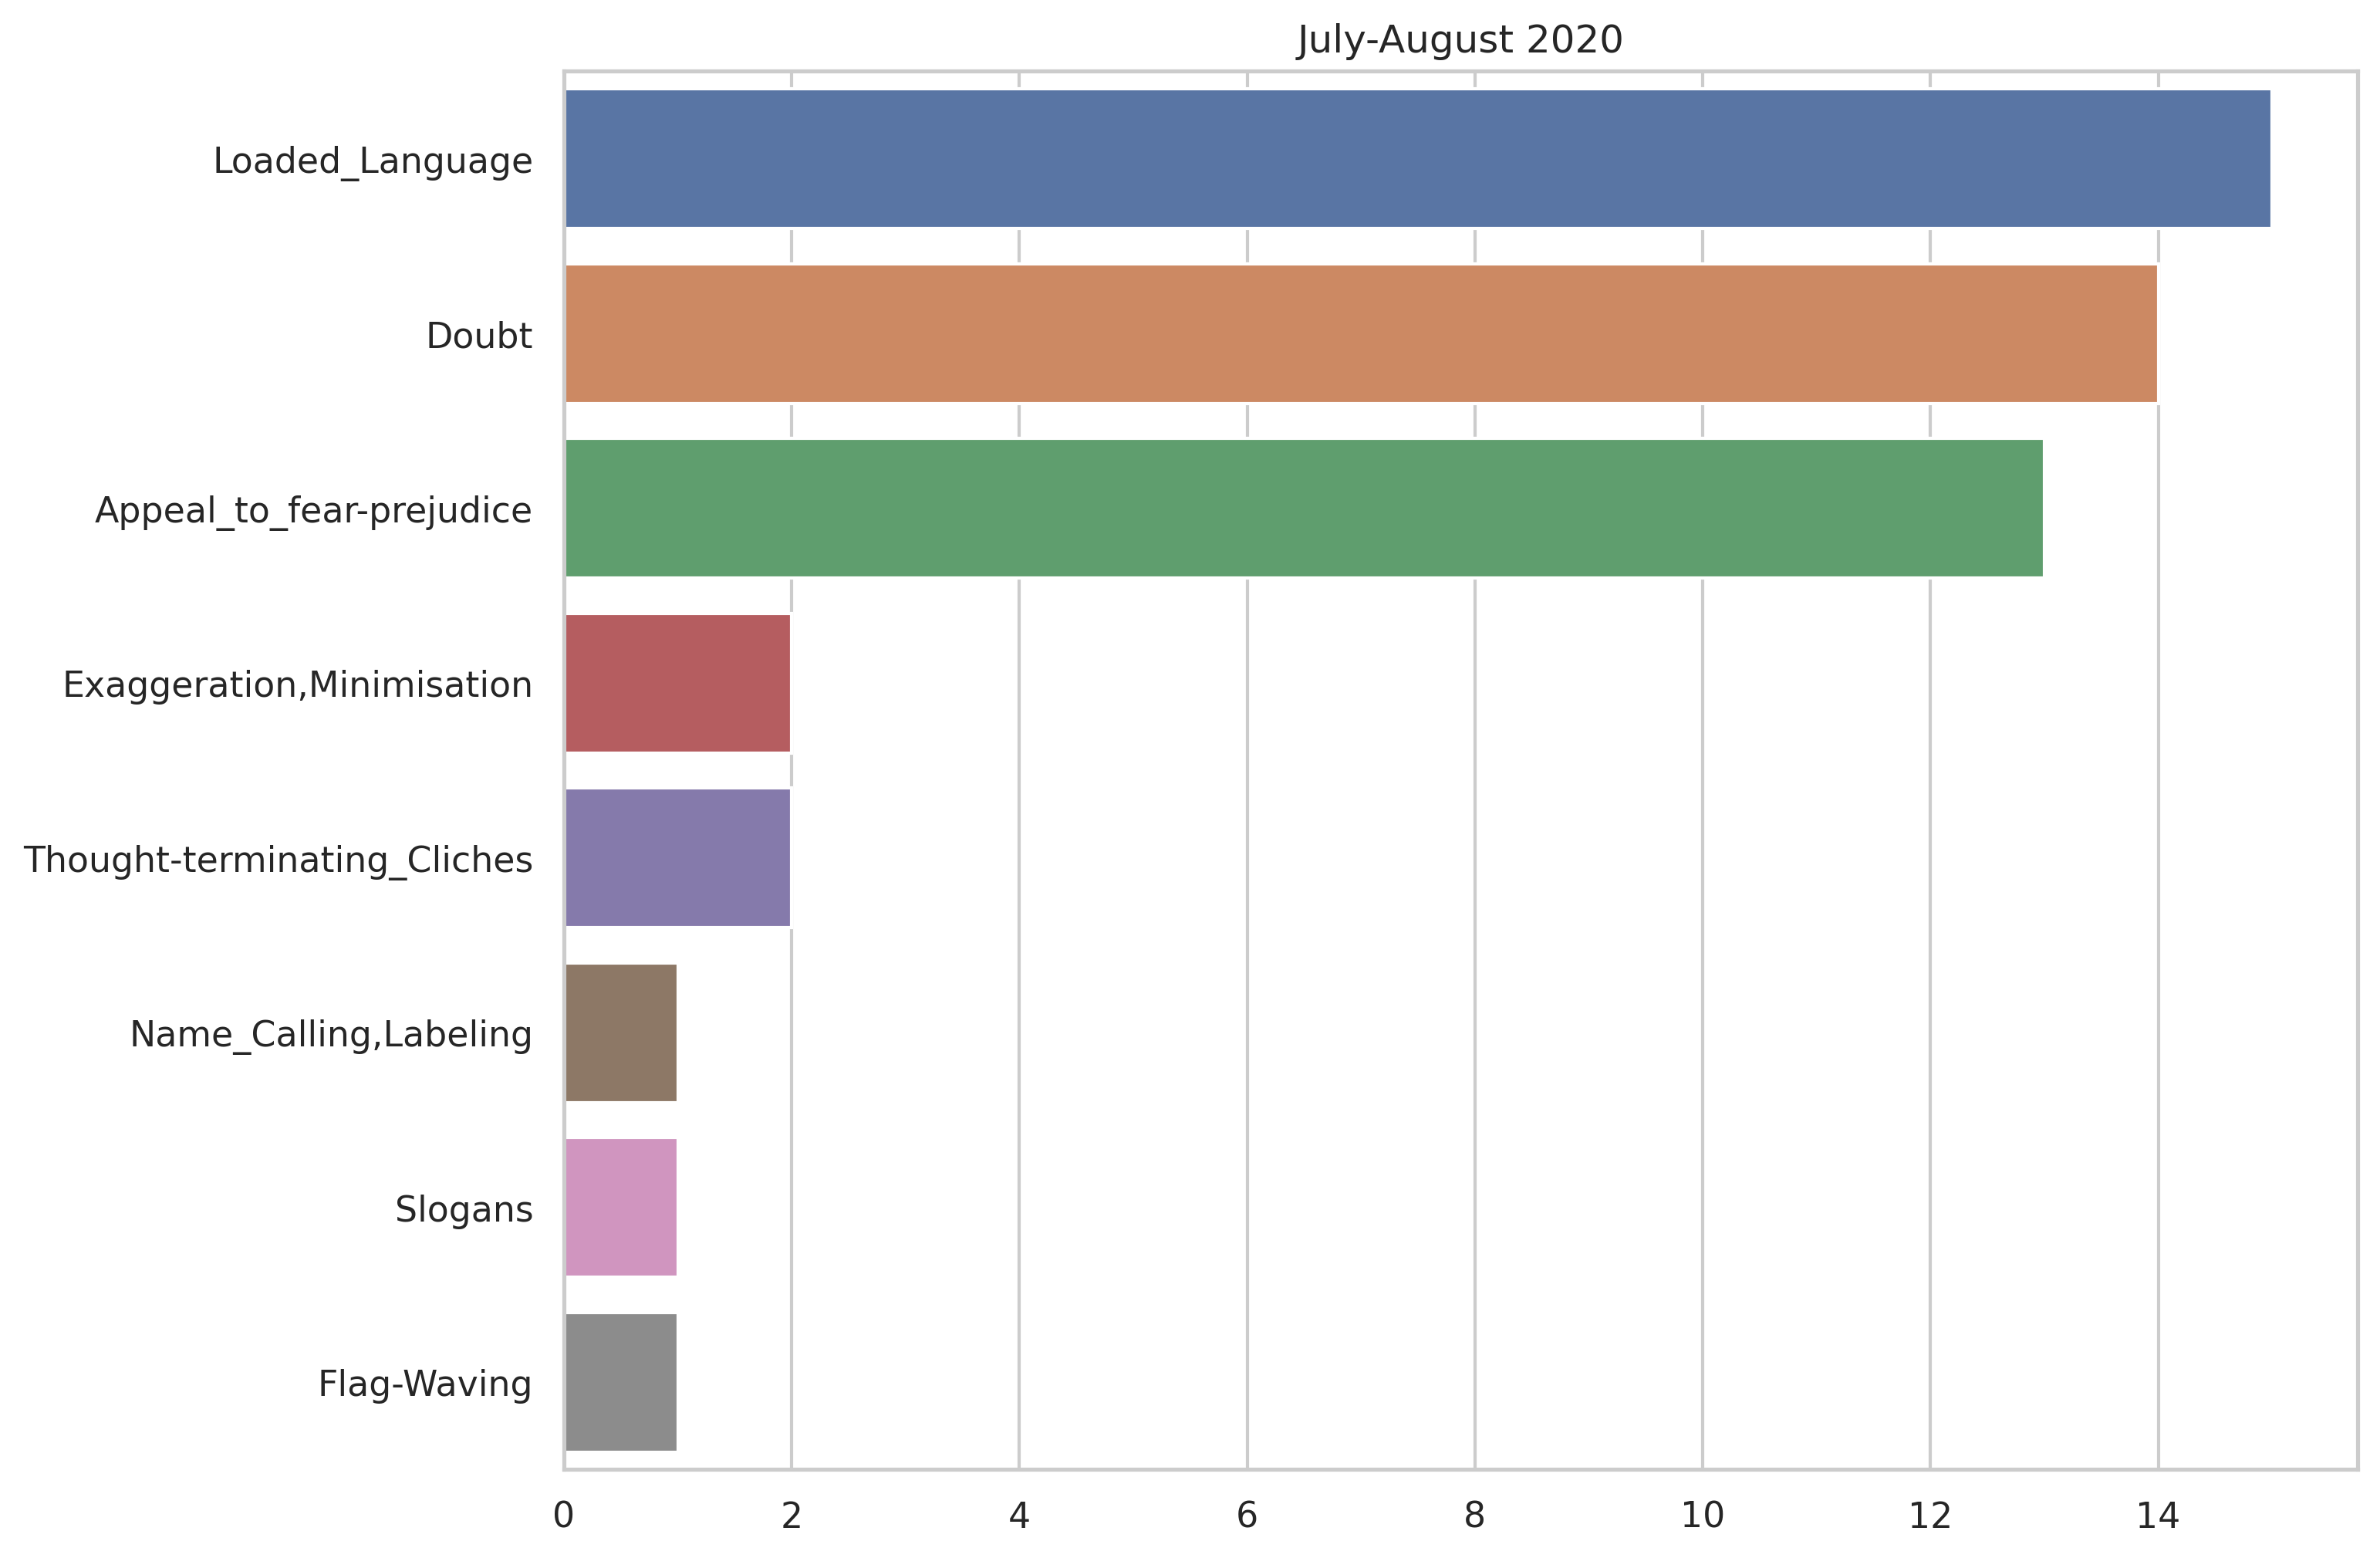

In [22]:
BarPlotValueCounts(july_august, ACPC, title = "July-August 2020")

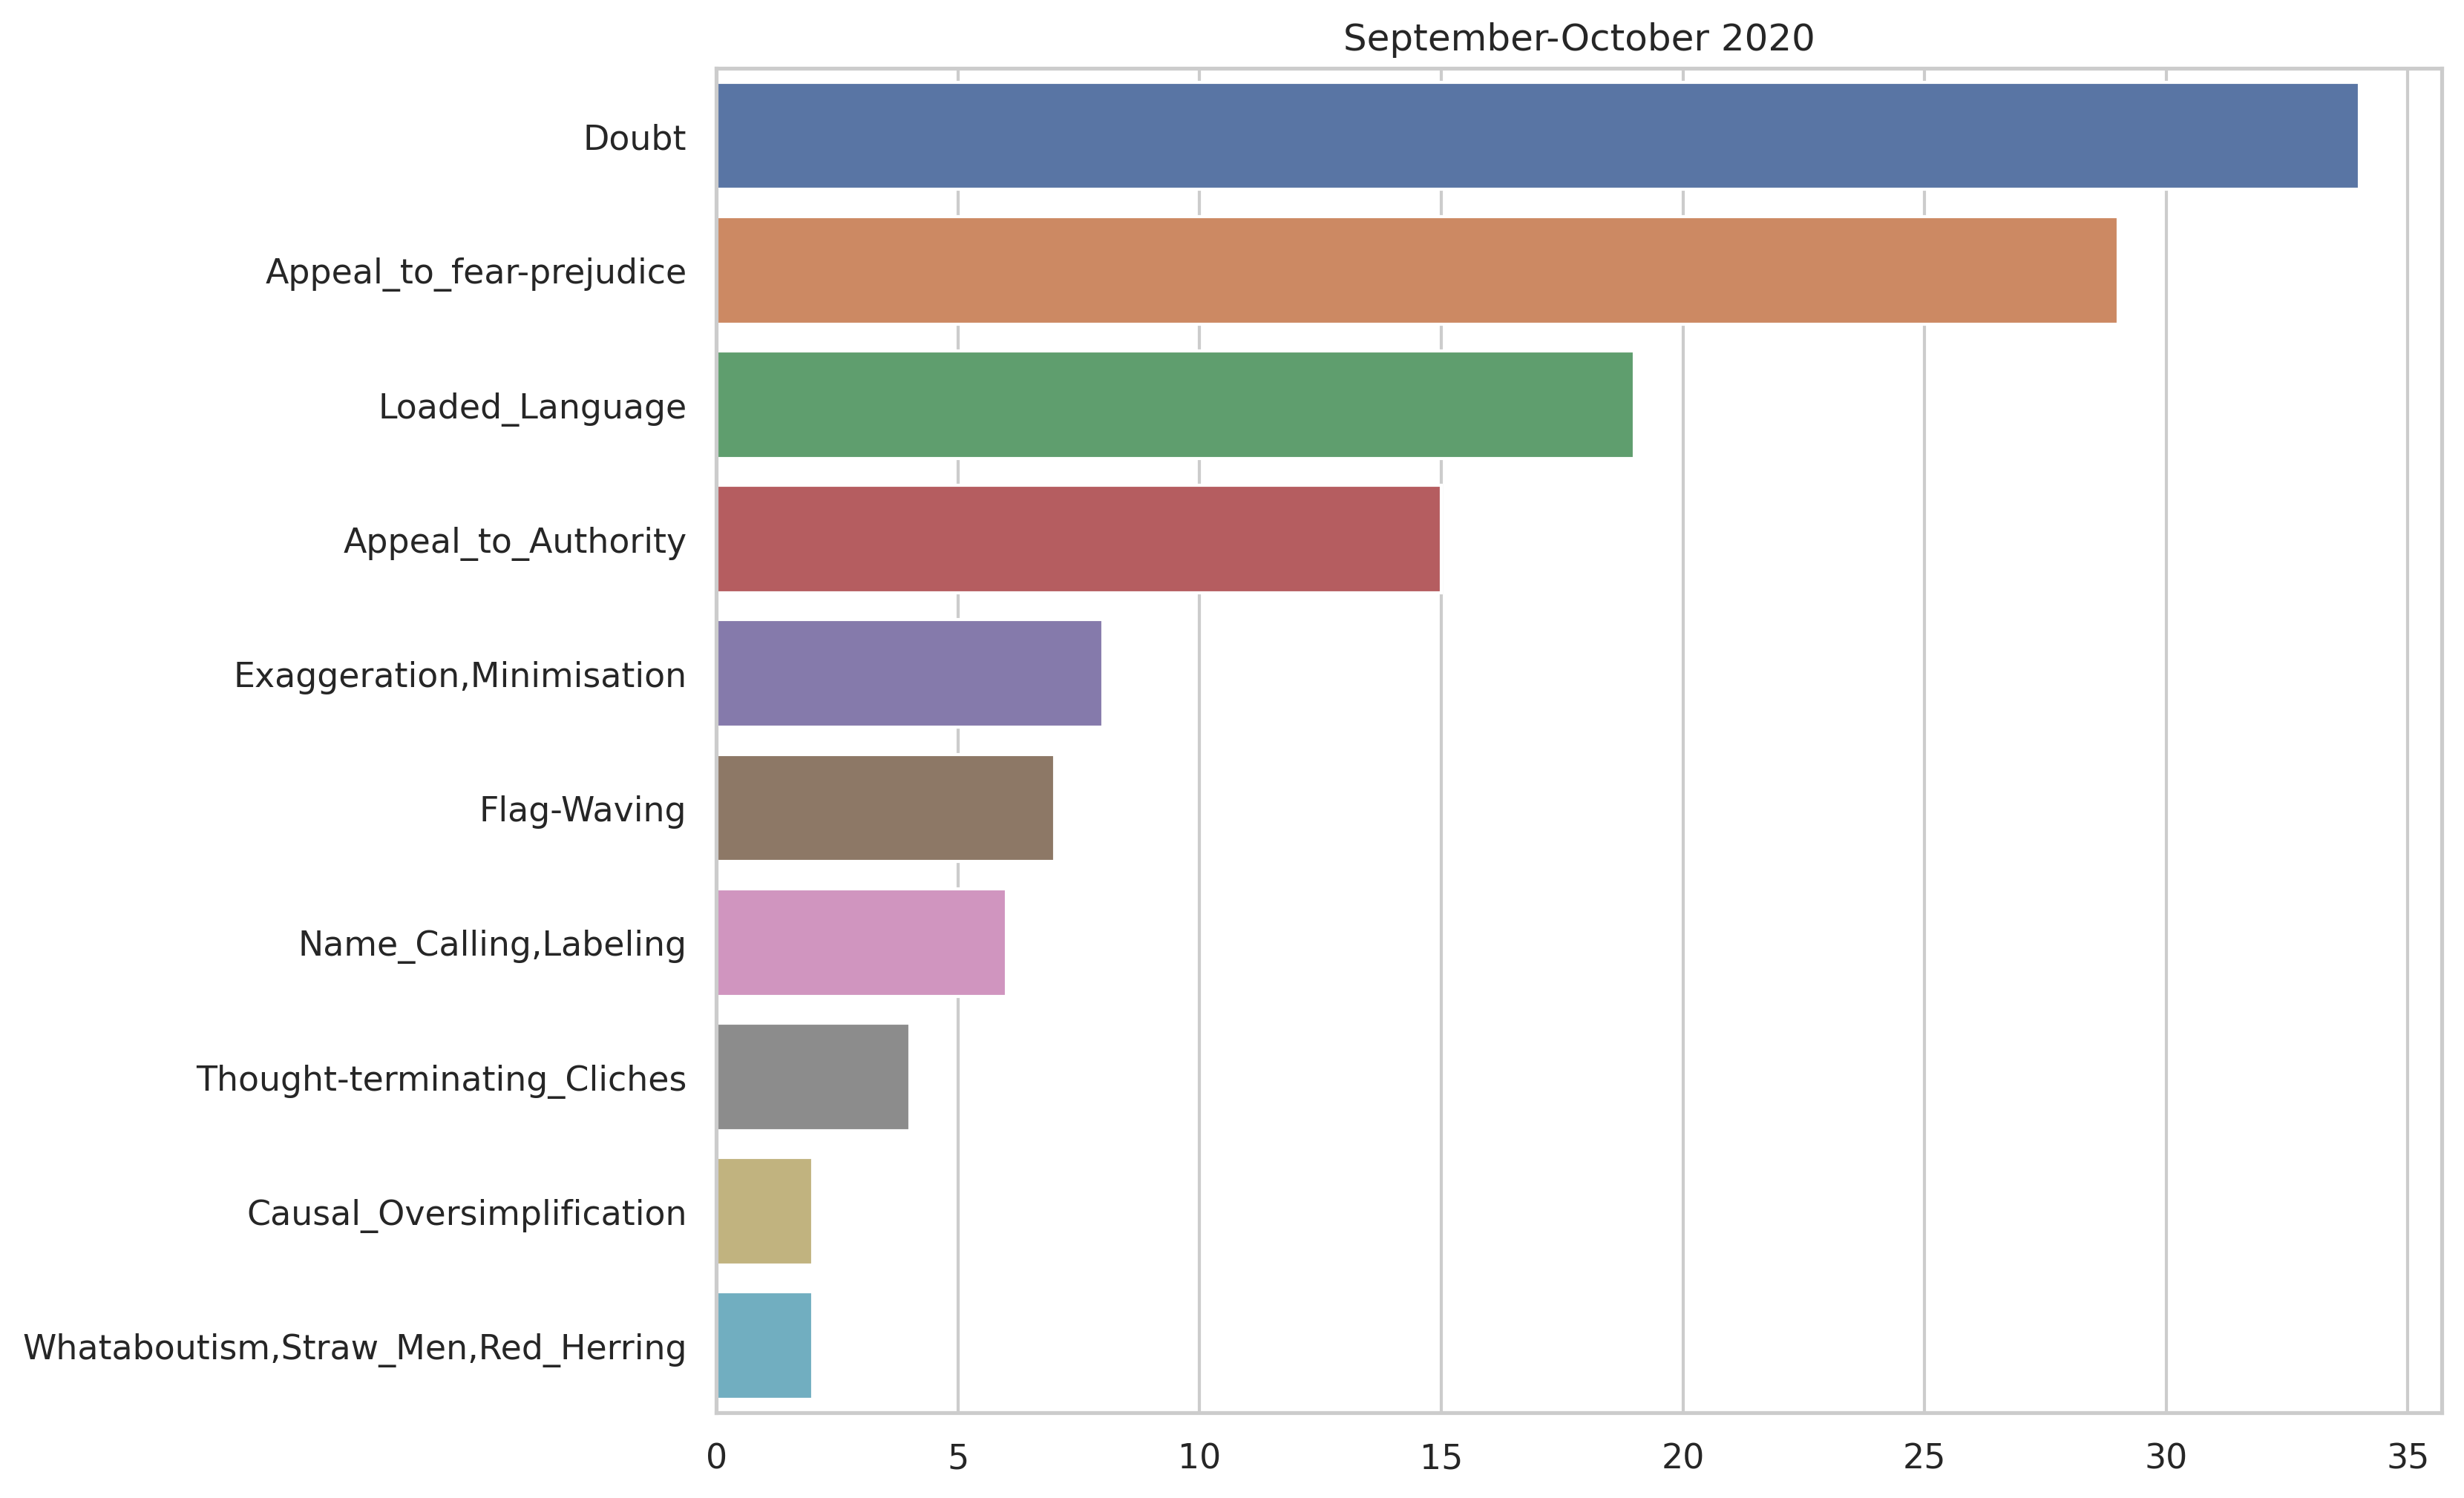

In [23]:
BarPlotValueCounts(september_october, ACPC, title = "September-October 2020")

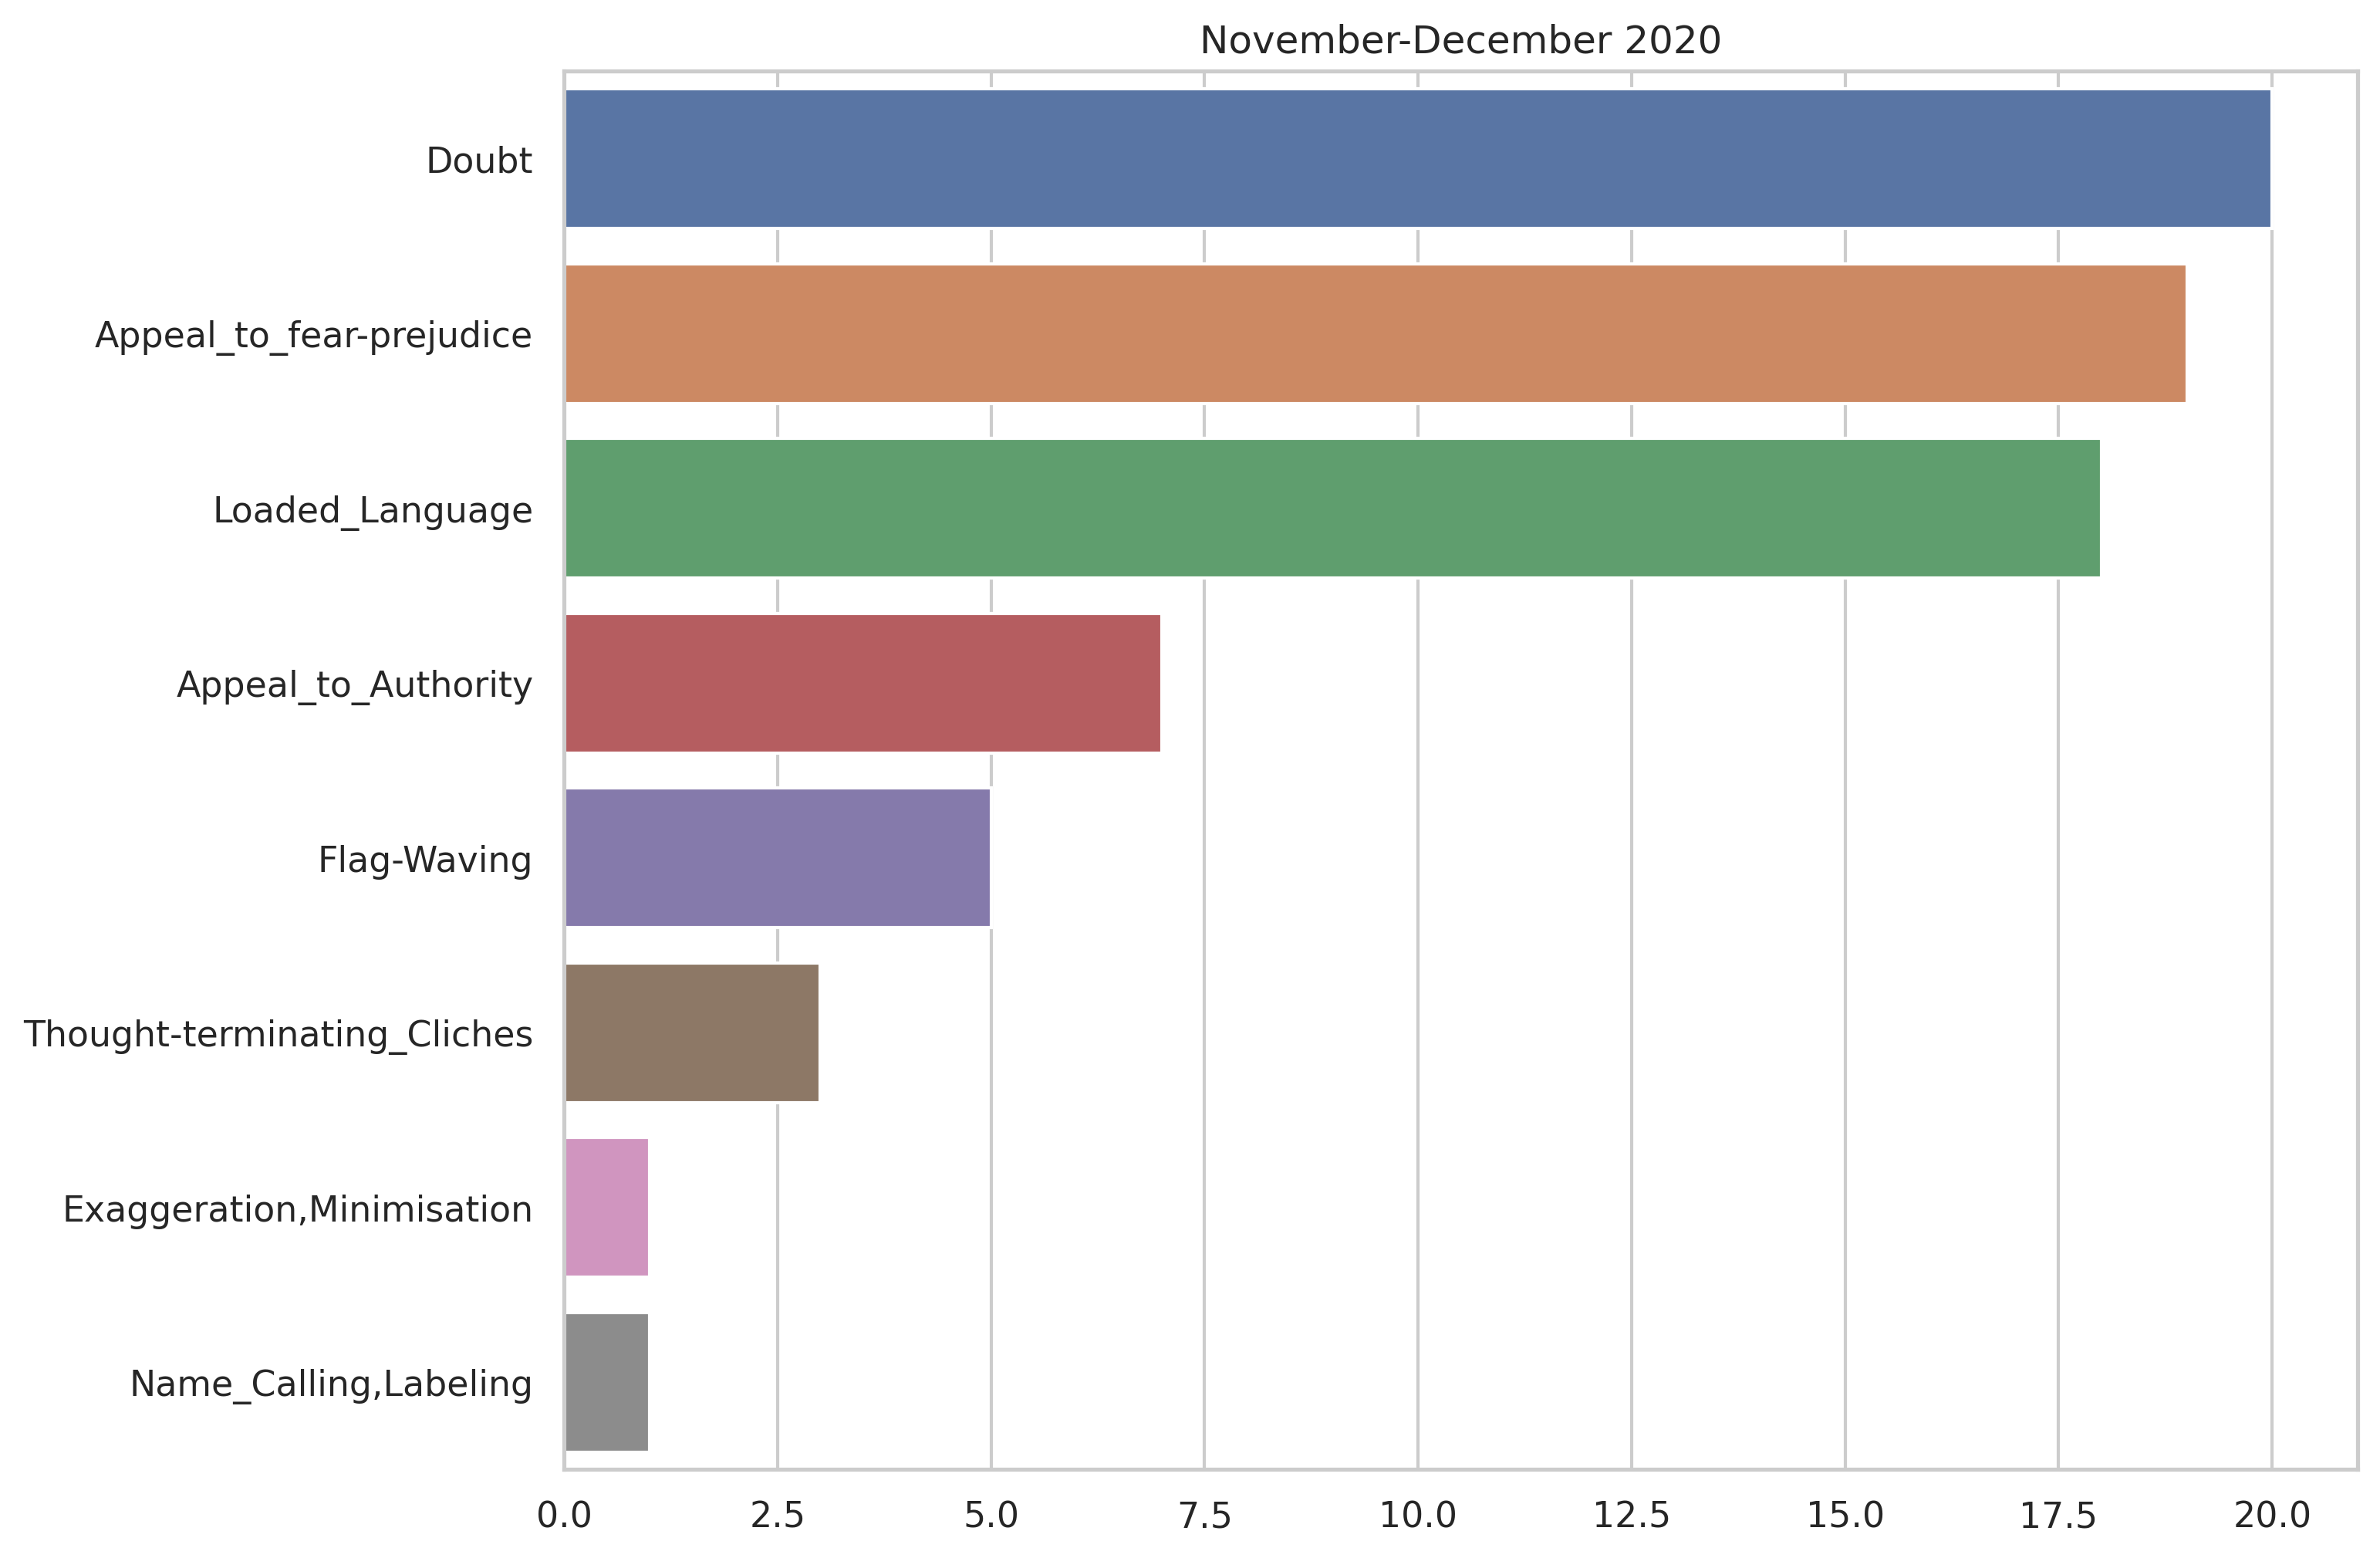

In [24]:
BarPlotValueCounts(november_december, ACPC, title = "November-December 2020")